# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.067763e+01     8.144237e+00
 * time: 0.001901865005493164
     1     2.287284e+01     4.031038e+00
 * time: 0.00860285758972168
     2     1.603796e+01     3.810949e+00
 * time: 0.014346837997436523
     3     1.176708e+01     2.048021e+00
 * time: 0.018249988555908203
     4     9.845149e+00     1.509777e+00
 * time: 0.02226400375366211
     5     9.298430e+00     1.586762e+00
 * time: 0.025421857833862305
     6     8.951632e+00     7.527145e-01
 * time: 0.028947830200195312
     7     8.728261e+00     6.490648e-01
 * time: 0.03245878219604492
     8     8.523520e+00     7.172486e-01
 * time: 0.03638887405395508
     9     8.325071e+00     4.616136e-01
 * time: 0.040390968322753906
    10     8.223614e+00     4.459931e-01
 * time: 0.044174909591674805
    11     8.140842e+00     3.460492e-01
 * time: 0.08905196189880371
    12     8.117604e+00     6.704982e-01
 * time: 0.09198999404907227
    13     8.078690e+00     6.168289e-01
 

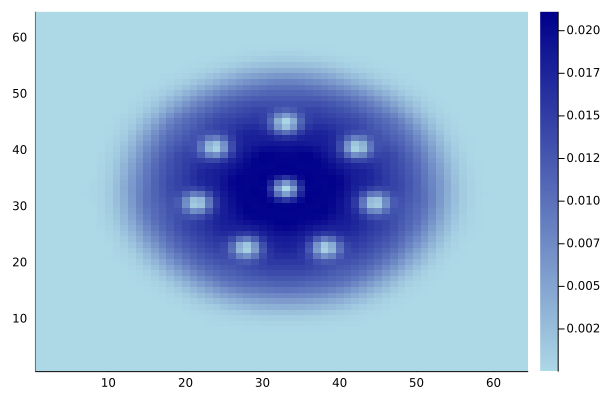

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)